In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from lifelines import KaplanMeierFitter
import matplotlib.ticker as mtick

In [3]:
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
kmf = KaplanMeierFitter(label="MetaBric Breast Cancer Data")
T = df['overall_survival_months'] 
E = df['overall_survival']
kmf.fit(T,E)


<lifelines.KaplanMeierFitter:"MetaBric Breast Cancer Data", fitted with 1904 total observations, 1103 right-censored observations>

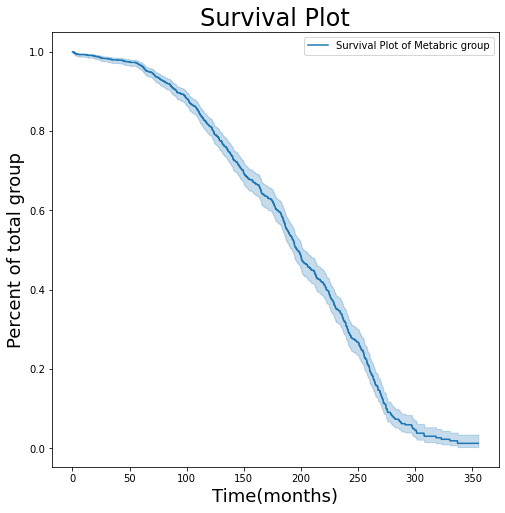

In [75]:
kmf.plot(figsize = (8,8))
plt.xlabel("Time(months)", fontsize = 18)
plt.ylabel("Percent of total group", fontsize = 18)
# fig.suptitle('test title', fontsize=20)

plt.title("Survival Plot", fontsize=24)
plt.savefig("kmf_survival_plt.png", dpi=200)

In [6]:
df.overall_survival


0       1
1       1
2       0
3       1
4       0
       ..
1899    1
1900    0
1901    0
1902    0
1903    0
Name: overall_survival, Length: 1904, dtype: int64

In [7]:
df.overall_survival_months

0       140.500000
1        84.633333
2       163.700000
3       164.933333
4        41.366667
           ...    
1899    196.866667
1900     44.733333
1901    175.966667
1902     86.233333
1903    201.900000
Name: overall_survival_months, Length: 1904, dtype: float64

In [9]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df['death_from_cancer'].replace(death_from_dict, inplace =True)

In [10]:
df.death_from_cancer

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1899    0.0
1900    1.0
1901    1.0
1902    0.0
1903    0.0
Name: death_from_cancer, Length: 1904, dtype: float64

In [11]:
filt = df.death_from_cancer == 1

In [12]:
df_death = df[filt]

In [13]:
df_death


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,0,0,0,0,0,0,0,0,0,0
10,36,85.49,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,7291,53.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1896,7292,52.90,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1898,7294,59.20,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [30]:
kmf = KaplanMeierFitter(label="Survival Plot of Metabric group")
T = df['overall_survival_months'] 
E = df['overall_survival']
kmf.fit(T,E)
# kmf.set_title('some line')
kmf.plot(set_title('some line'))

NameError: name 'set_title' is not defined

In [15]:
df_death.overall_survival_months

2       163.700000
4        41.366667
5         7.800000
9        36.266667
10      132.033333
           ...    
1895      6.833333
1896     78.466667
1898     82.733333
1900     44.733333
1901    175.966667
Name: overall_survival_months, Length: 622, dtype: float64

In [16]:
df_death['overall_survival']

2       0
4       0
5       0
9       0
10      0
       ..
1895    0
1896    0
1898    0
1900    0
1901    0
Name: overall_survival, Length: 622, dtype: int64

In [17]:
E = df['overall_survival']

In [18]:
E

0       1
1       1
2       0
3       1
4       0
       ..
1899    1
1900    0
1901    0
1902    0
1903    0
Name: overall_survival, Length: 1904, dtype: int64

In [31]:
dir(kmf)

['_KaplanMeierFitter__estimate',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_additive_f',
 '_additive_var',
 '_bounds',
 '_censoring_type',
 '_check_values',
 '_class_name',
 '_cumulative_sq_',
 '_estimate_name',
 '_estimation_method',
 '_fit',
 '_label',
 '_median',
 'alpha',
 'conditional_time_to_event_',
 'confidence_interval_',
 'confidence_interval_cumulative_density_',
 'confidence_interval_survival_function_',
 'cumulative_density_',
 'cumulative_density_at_times',
 'cumulative_hazard_at_times',
 'divide',
 'durations',
 'entry',
 'event_observed',
 'event_table',
 'fit',
 'fit_interval_censoring',
 'fit_left_censoring',
 'fit_right_cen

In [35]:
kmf.median_survival_time_

196.8666667

In [42]:
df.shape

(1904, 693)

<AxesSubplot:>

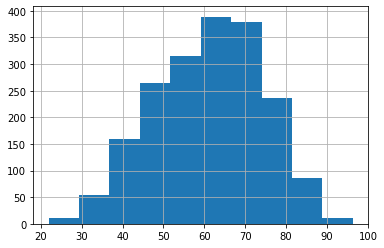

In [46]:
df.age_at_diagnosis.hist()

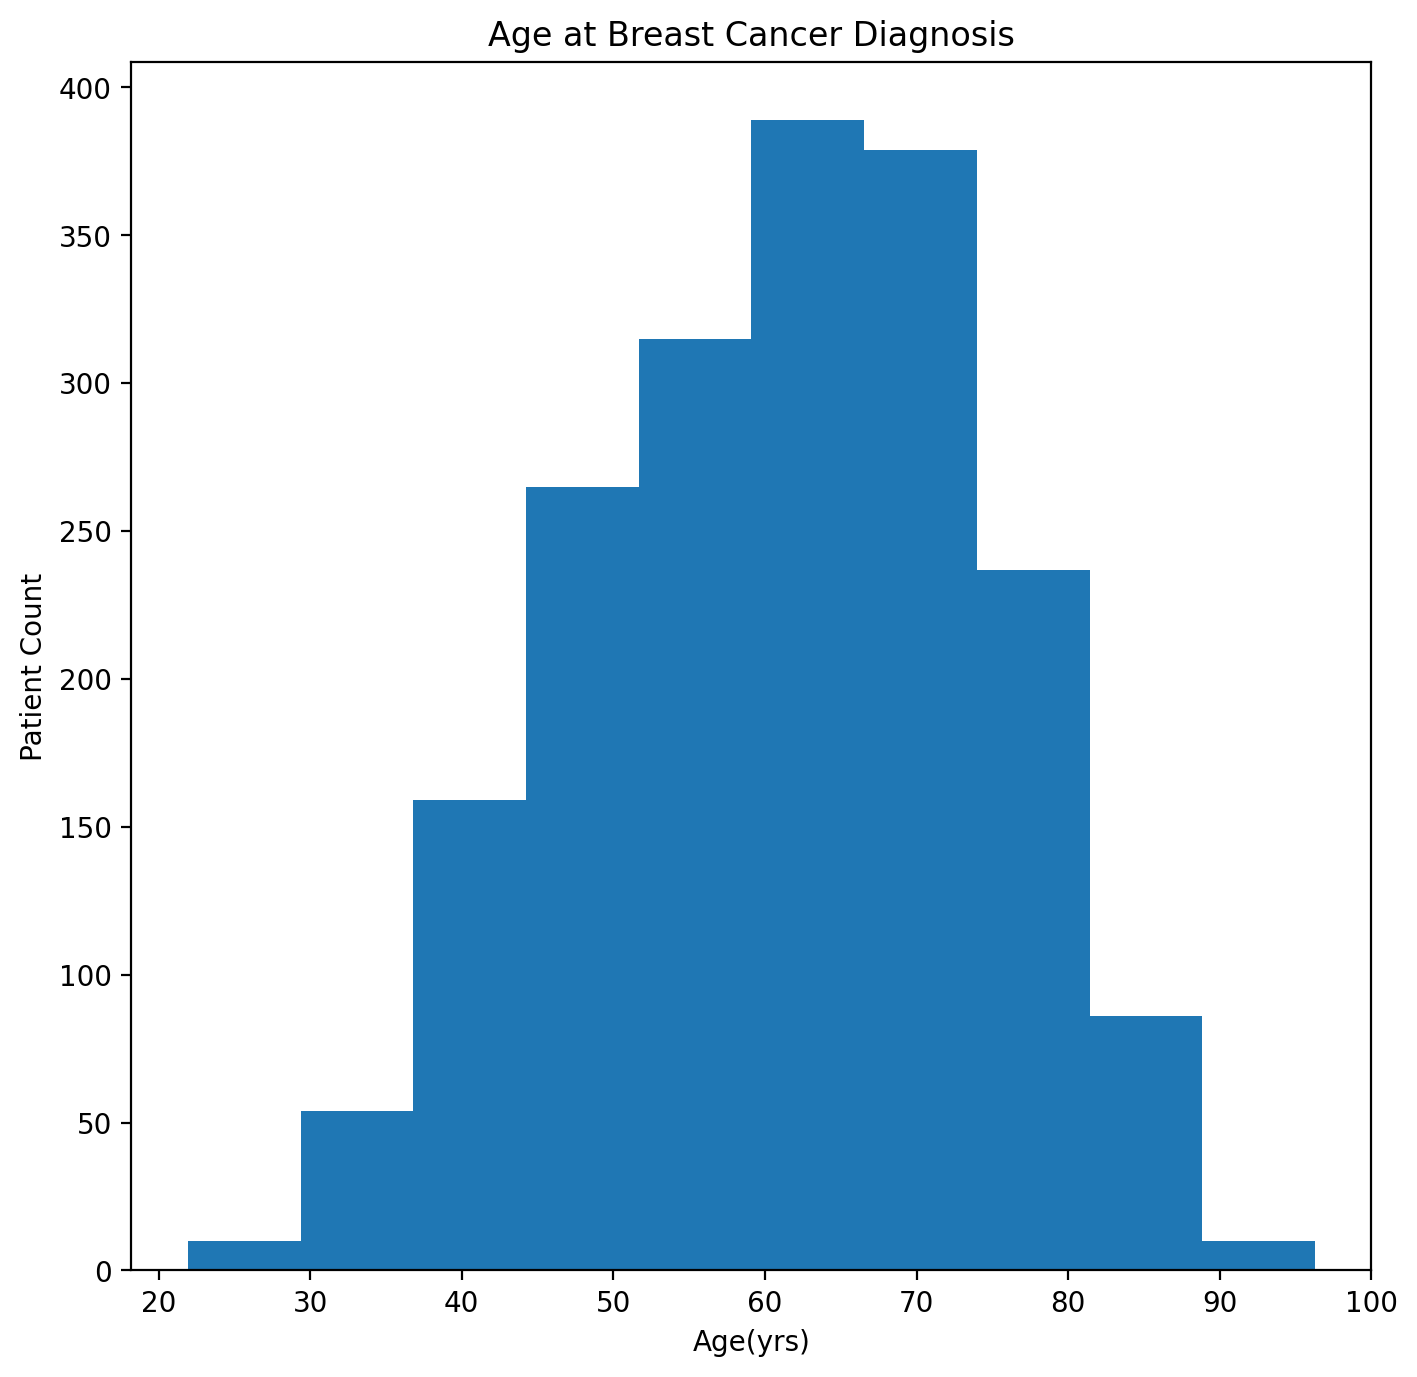

In [64]:
fig, ax = plt.subplots(figsize = (8,8),dpi =200)#figsize = (8,8,),dpi =200
ax.hist(df.age_at_diagnosis)
ax.set_title('Age at Breast Cancer Diagnosis')
ax.set_xlabel('Age(yrs)')
ax.set_ylabel('Patient Count')
plt.savefig("full_age_at_diagnosis_time.png")

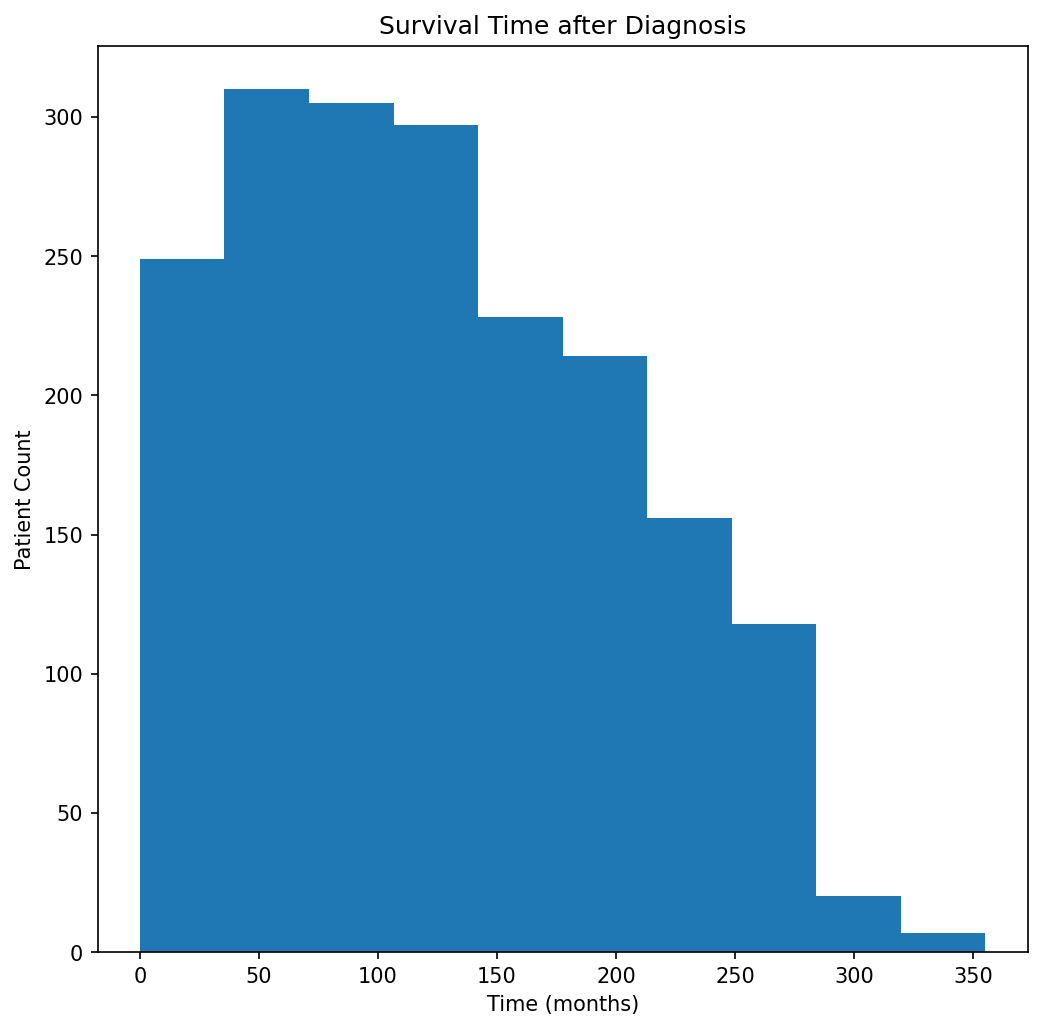

In [63]:
fig, ax = plt.subplots(figsize = (8,8), dpi = 150)#figsize = (8,8,),dpi =200
ax.hist(df.overall_survival_months)
ax.set_title('Survival Time after Diagnosis')
ax.set_xlabel('Time (months)')
ax.set_ylabel('Patient Count')

plt.savefig("full_survival_time.png", dpi=200)

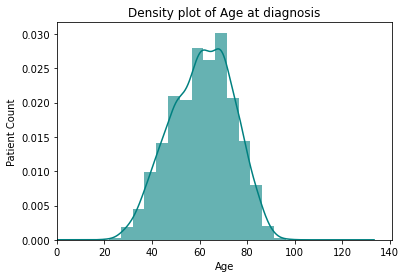

In [83]:


ax = df["age_at_diagnosis"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["age_at_diagnosis"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
ax.set_title('Density plot of Age at diagnosis')
ax.plot(figsize = (12,12))
ax.set_ylabel('Patient Count')
plt.xlim(0)
# plt.savefig("age_at_diagnosis_density.png")
plt.show()

In [84]:
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.mutation_count.value_counts()

5.0     268
4.0     248
6.0     232
3.0     229
2.0     193
7.0     168
8.0     121
1.0     107
9.0      90
10.0     61
11.0     38
12.0     25
13.0     17
14.0     16
15.0     11
16.0      8
17.0      5
22.0      4
20.0      4
19.0      2
23.0      2
18.0      2
21.0      1
28.0      1
26.0      1
24.0      1
40.0      1
46.0      1
30.0      1
80.0      1
Name: mutation_count, dtype: int64

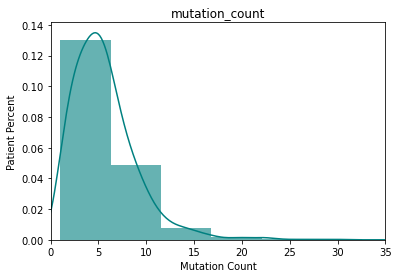

In [100]:
# df.mutation_count.hist()
# fig, ax = plt.subplots(figsize = (8,8), dpi = 150)#figsize = (8,8,),dpi =200
# ax.hist(df.mutation_count)
# ax.set_title('Survival Time after Diagnosis')
# ax.set_xlabel('Time (months)')
# ax.set_ylabel('Patient Count')

# plt.savefig("full_survival_time.png", dpi=200)





ax = df["mutation_count"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["mutation_count"].plot(kind='density', color='teal')
ax.set(xlabel='Mutation Count')
ax.set_title('Mutation Count of Breast Cancer Patients')
ax.plot(figsize = (12,12))
ax.set_ylabel('Patient Percent')
plt.xlim(0, 35)
plt.savefig("Mutation_coupng")
plt.show()

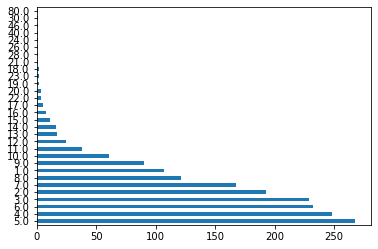

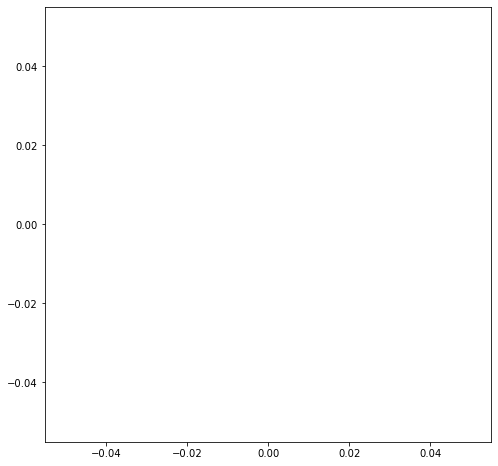

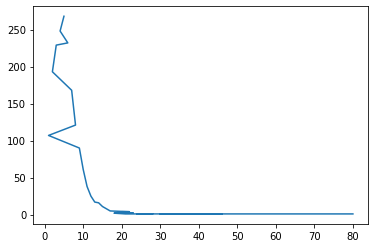

In [98]:
df.mutation_count.value_counts().plot(kind = 'barh')

fig, ax = plt.subplots(figsize = (8,8))
ax.plot()


fig, ax = plt.subplots()

ax.plot(df.mutation_count.value_counts())

# ax.set_title('some stuff')
# ax.set_xlabel('horizontal axis')
# ax.set_ylabel('vertical axis')
# ax